# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [2]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [3]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Alice', 'Bob', 'Chuck']

Here's how we add edges between nodes.

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

And here's how to draw the graph.

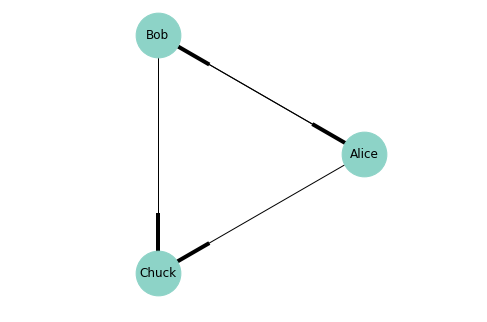

In [5]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

In [6]:
# Solution goes here

G.add_node('Robert')
G.add_node('Allison')
G.add_node('Charles')
G.add_edge('Robert', 'Bob')
G.add_edge('Allison', 'Alice')
G.add_edge('Charles', 'Chuck')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [7]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [8]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['Philly', 'Boston', 'NYC', 'Albany']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [9]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [10]:
G.add_edges_from(drive_times)
G.edges()

[('Philly', 'NYC'), ('Boston', 'NYC'), ('Boston', 'Albany'), ('NYC', 'Albany')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

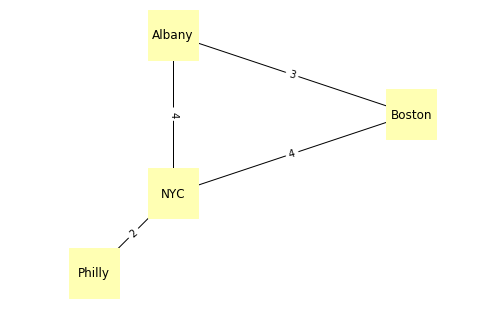

In [11]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

In [12]:
# Solution goes here
G.add_node('Seattle')
G.add_edge('Seattle','Boston')
pos['Seattle'] = (-90, 44)
drive_times[('Seattle','Boston')] = 55

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [13]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [14]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [15]:
complete = make_complete_graph(10)
complete.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

And here's what it looks like.

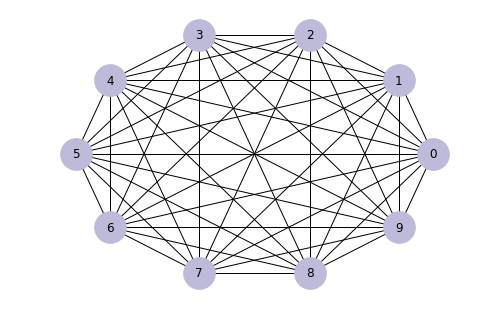

In [16]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [17]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

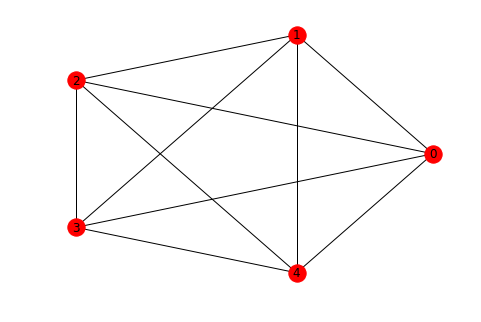

In [18]:
# Solution goes here
five_nodes = make_complete_graph(5)
nx.draw_circular(five_nodes, with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [19]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [20]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [21]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [22]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

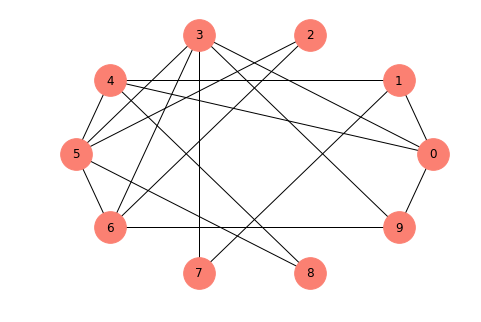

In [23]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [24]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [25]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [26]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [27]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [28]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [29]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [30]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [31]:
# Solution goes here
def reachable_directed(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.successors(node))
    return seen

def is_connected_directed(G):
    start = next(G.nodes_iter())
    reachable = reachable_directed(G, start)
    return len(reachable) == len(G)
    
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

G.add_edge('Alice', 'Bob')
G.add_edge('Chuck', 'Alice')
G.add_edge('Bob', 'Alice')
G.add_edge('Chuck', 'Bob')
# G.add_edge('Bob', 'Chuck')

print(is_connected_directed(G))


False


## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [32]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [33]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [34]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [35]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [36]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.004
0.123026877081 0.016
0.165958690744 0.11
0.223872113857 0.346
0.30199517204 0.664
0.407380277804 0.899
0.549540873858 0.989
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

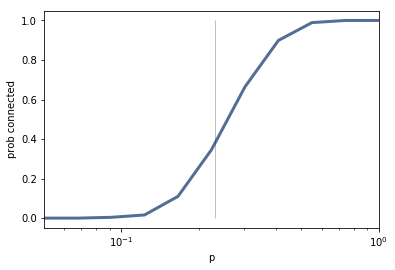

In [37]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

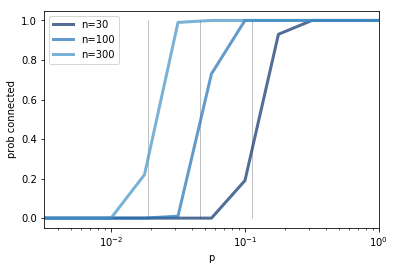

In [38]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

# Solution goes here
In the first line, we get the first node from our graph using `nodes_iter`, which happens in constant time.
Next, we get our set of reachable nodes, using `reachable_nodes`, which, as discussed earlier, happens in $O(n + m)$.
Finally, we get the lengths of the reachable nodes and the graph, both of which happen in $O(1)$, and simply compare them.

All together, this process is in the same order of `reachable_nodes`, which is $O(n + m)$, the sum of nodes and edges.


**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [39]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend([neighbor for neighbor in G.neighbors(node) if neighbor not in seen])
    return seen

# Solution goes here

Now that we are checking for previous visitation of a given neighbor node before we add it to the stack, we can consider the order of growth differently. Seen only receives `n` members and stack also only receives `n` members. However, the statement where we check for membership in the set before adding it to stack `neighbor for neighbor in G.neighbors(node) if neighbor not in seen`, must still check each neighbor of a given node. While the check happens in $O(1)$, we still do this for each neighbor of every node, resulting in `m` (# of edges) operations, arriving in an order of $O(n + m)$. This "optimized" function is not in fact faster and was, when timed, actually very slightly slower than `reachable_nodes`

In [40]:
%timeit len(reachable_nodes(complete, 0))

100000 loops, best of 3: 16.7 µs per loop


In [41]:
%timeit len(reachable_nodes_precheck(complete, 0))

10000 loops, best of 3: 17.6 µs per loop


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [42]:
# Solution goes here
import random
def m_pairs(nodes, m):
    return random.sample(set(all_pairs(nodes)),m)

# m_pairs(complete.nodes(), 10)

In [43]:
# Solution goes here
def make_m_graph(n, m):
    if (m >= (n*(n-1)/2)):
        raise ValueError("Too many edges, not enough nodes", n, m)
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

# make_m_graph(3,5)

In [ ]:
# Solution goes here
def prob_connected_m_graph(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_m_graph(n, m)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [ ]:
from itertools import chain

ns = [30, 100, 300]

# seems to get to ~100% when we get to m = n^1.5
ms = np.logspace(0, .15, 11)


thinkplot.preplot(len(ns))
for n in ns:
    # seems to have a turning point around m = n^1.2
    mstar = n**1.2
    thinkplot.vlines([mstar], 0, 1, color='gray')
    
    ys = [prob_connected_m_graph(n, int(round(n**m))) for m in ms]
    thinkplot.plot(n**ms, ys, label='n=%d' % n)

thinkplot.config(xlabel='m', ylabel='prob connected',
                 xscale='log', loc='upper left')

As seen in the graphs above, the ER graph with `g(n,m)` is very similar to `g(n,p)`. Instead of having a critical value of `log(n)/n`, we see that it the critical value is consistently around `m=n^1.2`. Below that, the chance of connectivity is very low, and above that, it is very high.

# Panel Discussion Response
I thought that the panel discussion was pretty interesting, but people were too concerned with the formal stance on whether or not complexity science is a $science$. What matters to me, and what I'm most interested in, is how I can use fundamentals and tools to gain more insight into diverse problems. I was particularly intrigued (especially from class today 9/9) on the use of computational tools in invention, and how it can help us break outside the practices that civilization thought was right for hundreds of years. I'm hoping to be exposed to more ideas during this class so I can broaden my perspective.